# K-Means Clustering

## 1. Generate 2D blobs

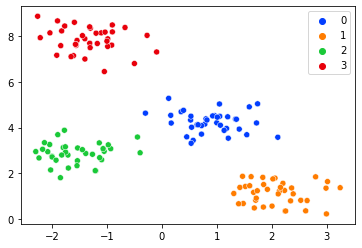

In [14]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import seaborn as sns

points, categories = make_blobs(n_samples = 150, centers = 4, cluster_std = 0.5, shuffle = True, random_state = 0)
ax = sns.scatterplot(x = points[:,0], y = points[:,1], hue = categories, palette = 'bright')
plt.savefig("clusters.jpg")
plt.show()

## 2. K-Means Clustering

In [15]:
# Needed to reload ATCS_KMeans module in case it has changed
import sys
del sys.modules['ATCS_KMeans']
from ATCS_KMeans import ATCS_KMeans

### 2.1. Randomly Select Cluster Centers

[[-1.03512641  8.17391403]
 [ 1.06498315  4.10289686]
 [-1.54641279  7.80917637]
 [ 1.42002502  1.38236201]]


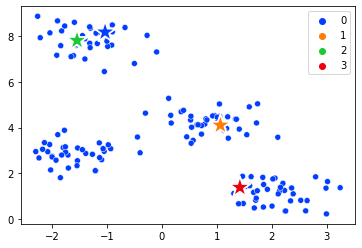

In [16]:
clustering = ATCS_KMeans(points, 4)
clustering.init_centroids_random()
clustering.draw_state()

### 2.2 Assign Points to Cluster Centers

[[-1.03512641  8.17391403]
 [ 1.06498315  4.10289686]
 [-1.54641279  7.80917637]
 [ 1.42002502  1.38236201]]


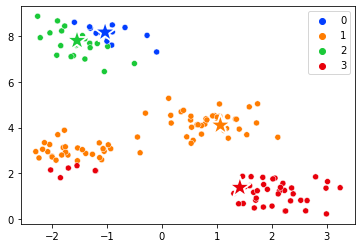

SSE: 389.07338890666125


In [17]:
clustering.classify_points()
clustering.draw_state()
print("SSE:", clustering.calculate_SSE())

### 2.3. Recalculate Cluster Centers

[[-0.95006576  8.10260418]
 [-0.2047425   3.6952182 ]
 [-1.5601696   7.67382463]
 [ 1.58246258  1.27176187]]


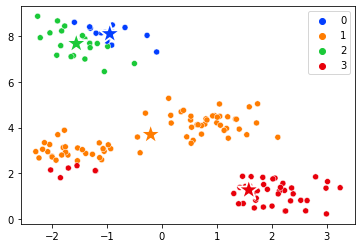

In [18]:
clustering.update_centroids()
clustering.draw_state()

### 2.4 Reassign Points to Cluster Centers

[[-0.95006576  8.10260418]
 [-0.2047425   3.6952182 ]
 [-1.5601696   7.67382463]
 [ 1.58246258  1.27176187]]


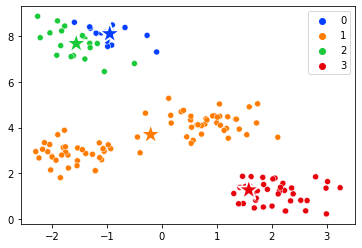

SSE: 225.59564508868883


In [19]:
clustering.classify_points()
clustering.draw_state()
print("SSE:", clustering.calculate_SSE())

### 2.5. Recalculate Cluster Centers

[[-0.95257626  8.06560163]
 [-0.3156604   3.56949644]
 [-1.58618988  7.67956365]
 [ 2.08356978  1.13724593]]


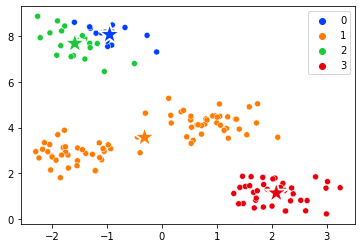

In [20]:
clustering.update_centroids()
clustering.draw_state()

### 2.6. Classification Loop

SSE: 160.85897016351984
SSE: 70.94590093440405
SSE: 70.84088742368907
SSE: 70.84088742368907
[[-1.55311219  2.87260114]
 [-1.32931949  7.83606554]
 [ 2.08356978  1.13724593]
 [ 0.88922686  4.24805239]]


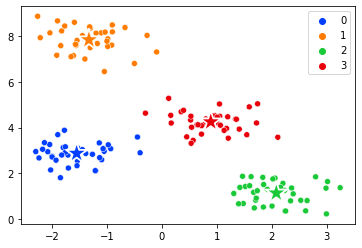

In [21]:
clustering = ATCS_KMeans(points, 4)
clustering.init_centroids_random()
SSE = 0
stop = False
while not stop:
    clustering.classify_points()
    newSSE = clustering.calculate_SSE()
    print("SSE:", newSSE)
    clustering.update_centroids()
    if abs(newSSE - SSE) < 0.0001:
        stop = True
    SSE = newSSE
clustering.draw_state()

## 3. How to Increase Robustness?
### 3.1. Multiple Initializations

Iteration:  0
SSE: 663.9081993815568
SSE: 124.93525810378853
SSE: 70.84088742368907
SSE: 70.84088742368907
Iteration:  1
SSE: 283.84702561405265
SSE: 213.79692116791512
SSE: 203.35680474235244
SSE: 152.440757857468
SSE: 75.23540395650411
SSE: 70.84088742368907
SSE: 70.84088742368907
Iteration:  2
SSE: 742.0055401174554
SSE: 83.77274124967717
SSE: 70.84088742368907
SSE: 70.84088742368907
Iteration:  3
SSE: 1140.0080212605696
SSE: 243.82488105598372
SSE: 148.9750791897331
SSE: 76.2684845378961
SSE: 70.84088742368907
SSE: 70.84088742368907
Iteration:  4
SSE: 172.38284846139044
SSE: 70.94590093440405
SSE: 70.84088742368907
SSE: 70.84088742368907
Iteration:  5
SSE: 521.1696379545923
SSE: 230.61115453233694
SSE: 102.35271018278672
SSE: 71.04352904347407
SSE: 70.84088742368907
SSE: 70.84088742368907
Iteration:  6
SSE: 417.24745494202693
SSE: 213.11568024292654
SSE: 210.40917479307063
SSE: 210.3057644848582
Iteration:  7
SSE: 1117.7502452857134
SSE: 241.4206660391013
SSE: 70.84088742368907
SSE

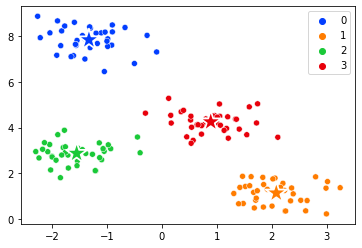

[[-1.32931949  7.83606554]
 [ 2.08356978  1.13724593]
 [-1.55311219  2.87260114]
 [ 0.88922686  4.24805239]]


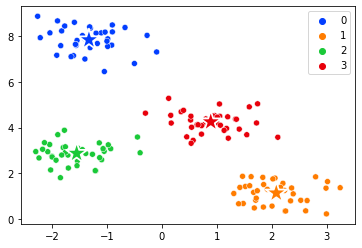


Final SSE: 70.84088742368907


In [22]:
clustering = ATCS_KMeans(points, 4, nbInit = 10)
clustering.cluster_points(True)
clustering.draw_state()
print("\nFinal SSE:", clustering.calculate_SSE())

### 3.2. KMeans++

Iteration:  0
SSE: 730.1532842125074
SSE: 272.92533026413446
SSE: 270.6281063543214
SSE: 268.91277726900626
SSE: 268.62194487708325
SSE: 268.62194487708325
Iteration:  1
SSE: 103.11919940967086
SSE: 70.84088742368907
SSE: 70.84088742368907
Iteration:  2
SSE: 169.2947789440094
SSE: 71.26864661693307
SSE: 70.84088742368907
SSE: 70.84088742368907
Iteration:  3
SSE: 659.7574223131505
SSE: 377.312024822045
SSE: 290.76169167062125
SSE: 174.74492087135127
SSE: 74.1414325100774
SSE: 70.84088742368907
SSE: 70.84088742368907
Iteration:  4
SSE: 125.9680443283715
SSE: 70.94590093440405
SSE: 70.84088742368907
SSE: 70.84088742368907
Iteration:  5
SSE: 122.10739291793811
SSE: 71.27151004715441
SSE: 70.84088742368907
SSE: 70.84088742368907
Iteration:  6
SSE: 471.9607385825188
SSE: 126.35381809073779
SSE: 72.95583192852683
SSE: 70.94590093440405
SSE: 70.84088742368907
SSE: 70.84088742368907
Iteration:  7
SSE: 358.6515906991784
SSE: 212.09655244399573
SSE: 212.09655244399573
Iteration:  8
SSE: 379.82620

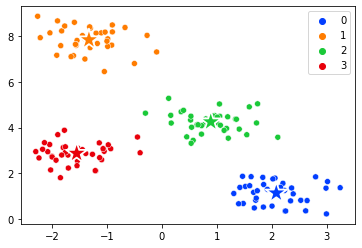

[[ 2.08356978  1.13724593]
 [-1.32931949  7.83606554]
 [ 0.88922686  4.24805239]
 [-1.55311219  2.87260114]]


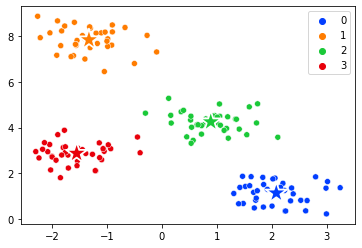

In [23]:
clustering = ATCS_KMeans(points, 4, init = '++')
clustering.cluster_points(verbose = True)
clustering.draw_state()

### 3.3. Multiple Initializations and KMeans++

Iteration:  0
SSE: 536.4467603838859
SSE: 174.17594699447176
SSE: 75.49082080696928
SSE: 70.84088742368907
SSE: 70.84088742368907
Iteration:  1
SSE: 219.65540659192257
SSE: 213.24073904977706
SSE: 213.0873783410429
Iteration:  2
SSE: 116.01426975323878
SSE: 70.84088742368907
SSE: 70.84088742368907
Final SSE: 70.84088742368907
[[-1.55311219  2.87260114]
 [-1.32931949  7.83606554]
 [ 0.88922686  4.24805239]
 [ 2.08356978  1.13724593]]


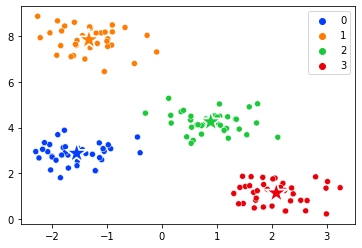

[[-1.55311219  2.87260114]
 [-1.32931949  7.83606554]
 [ 0.88922686  4.24805239]
 [ 2.08356978  1.13724593]]


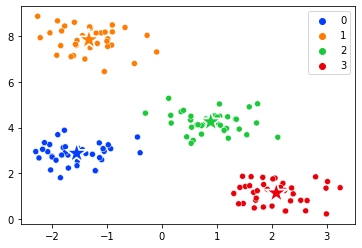


Final SSE: 70.84088742368907


In [24]:
clustering = ATCS_KMeans(points, 4, init = '++', nbInit = 3)
clustering.cluster_points(verbose = True)
clustering.draw_state()
print("\nFinal SSE:", clustering.calculate_SSE())

## 4. Determine the Number of Clusters

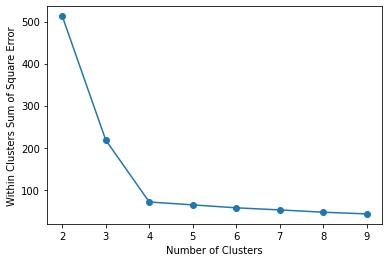

In [25]:
'''
Ks = range(2, 10)
SSEs = []
for k in Ks:
    clustering = ATCS_KMeans(points, k, init = '++', nbInit = 10, tolerance = 0.001, maxIter = 100)
    clustering.cluster_points(False)
    SSEs.append(clustering.calculate_SSE())
# Plot the SSE vs the number of cluster centers
plt.figure()
plt.plot(Ks, SSEs, marker = "o")
plt.xlabel("Number of Clusters")
plt.ylabel("Within Clusters Sum of Square Error")
plt.savefig("SSEs.jpg")
plt.show()
'''
clustering = ATCS_KMeans(points, 4, init = '++', nbInit = 10, tolerance = 0.001, maxIter = 100)
clustering.elbow_graph()

## 5. Drawbacks
### 5.1. Elongated Clusters

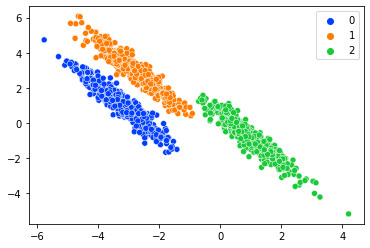

In [26]:
import numpy as np
points, categories = make_blobs(n_samples = 1500, centers = 3, random_state = 170)
# Transform the points to elongate the blobs
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
points = np.dot(points, transformation)
# Plot the points
ax = sns.scatterplot(x = points[:,0], y = points[:,1], hue = categories, palette = 'bright')
plt.show()

[[-2.60905045  0.86248407]
 [-3.32931706  3.1276501 ]
 [ 1.03138271 -0.92755057]]


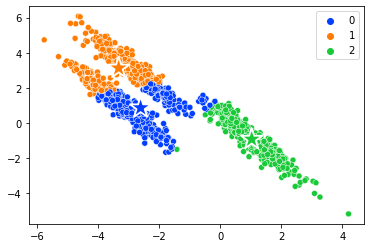


Final SSE: 1899.415088206689


In [27]:
clustering = ATCS_KMeans(points, 3, init = '++', nbInit = 10)
clustering.cluster_points()
clustering.draw_state()
print("\nFinal SSE:", clustering.calculate_SSE())

### 5.2. Unequal Variance

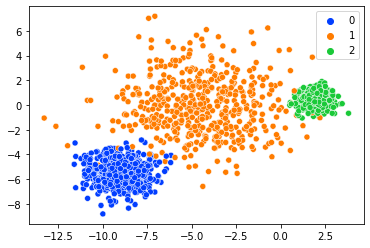

In [28]:
points, categories = make_blobs(n_samples = 1500, cluster_std = [1.0, 2.5, 0.5], random_state = 170)
ax = sns.scatterplot(x = points[:,0], y = points[:,1], hue = categories, palette = 'bright')
plt.show()

[[-8.87177269 -5.36630437]
 [ 1.6400471   0.44241664]
 [-4.90914469  0.11313436]]


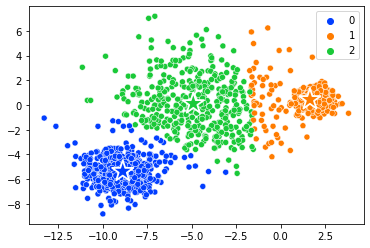


Final SSE: 5747.987366346285


In [29]:
clustering = ATCS_KMeans(points, 3, init = '++', nbInit = 10)
clustering.cluster_points()
clustering.draw_state()
print("\nFinal SSE:", clustering.calculate_SSE())

### 5.3. Unequal Size Clusters

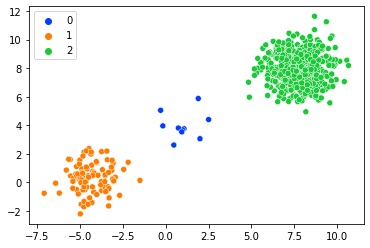

In [30]:
points, categories = make_blobs(n_samples = [10, 100, 500], cluster_std = 1.0, random_state = 3)
ax = sns.scatterplot(x = points[:,0], y = points[:,1], hue = categories, palette = 'bright')
plt.show()

[[ 7.92933451  8.88676593]
 [-3.94810102  0.55733728]
 [ 7.58519741  7.22964858]]


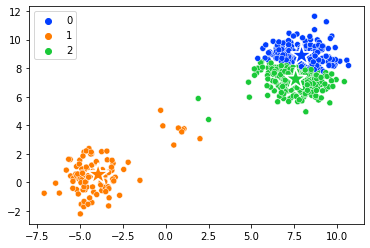


Final SSE: 1209.2224411347672


In [31]:
clustering = ATCS_KMeans(points, 3, init = '++', nbInit = 10)
clustering.cluster_points()
clustering.draw_state()
print("\nFinal SSE:", clustering.calculate_SSE())